In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import os

In [2]:
### Style of all plots
palette = sns.cubehelix_palette(start=0.5, rot=-.75, dark=0.3, light=0.8, reverse=True)
sns.set_palette(palette)
sns.set_style("white")
sns.set_context("paper")

# 1. Import and Read Data

In [3]:
train_df = pd.read_csv("data/train.csv")

train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
features_df = pd.read_csv("data/features.csv")

features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
stores_df = pd.read_csv("data/stores.csv")

stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


A rich dataset provided by Walmart on Kaggle has been used for this project. For more details about this dataset, visit the original link: Walmart Sales Forecast Dataset - https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting

The datasets and its respective columns are as follows:

### features.csv

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

    Store: Store number
    Date: Week
    Temperature: Average temperature in the region
    Fuel_Price: Cost of fuel in the region
    MarkDown1-5: Anonymized data related to promotional markdowns that Walmart is running. More information on these features is not available
    CPI: The consumer price index, a measure that examines the weighted average of prices of a basket of consumer goods and services

### stores.csv

This file contains anonymized information about the 45 stores, indicating the type and size of the store:

    Store: Stores numbered from 1 to 45
    Type: Store type has been provided, there are 3 types — A, B and C
    Size: Stores size has provided from 34.9k to 220k

### train.csv

This file contains data on weekly sales and holiday, and should be used to train our models.
    
    Store: Stores numbered from 1 to 45
    Dept: The department ID of the products represented in weekly sales
    Date: Week
    Weekly_Sales: Float value representing the volume of sales
    IsHoliday: Boolean value representing if the week in Date column contained a holiday
    


----------------------------------------------

In [6]:
# Group By Store and Date
## This will desconsider department-level analysis for our data

train_group = train_df.groupby(['Store', 'Date'])[['Weekly_Sales']].agg(sum)
train_group.reset_index(inplace=True)

train_group.head()

C:\Users\arthu\AppData\Local\Temp\ipykernel_1156\795094681.py:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  train_group = train_df.groupby(['Store', 'Date'])[['Weekly_Sales']].agg(sum)


,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


Similar to *ANUSHKA_ML*'s Notebook, available at - https://www.kaggle.com/code/anushkaml/walmart-time-series-sales-forecasting

We will be creating a new consolidated "df" with all our available data by Store and ignore Departments

In [7]:
train_group_train = pd.merge(train_group, stores_df, how='inner', on='Store', left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)
df = pd.merge(train_group_train, features_df, how='inner', on=['Store', 'Date'], left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)

df = df[df["Store"] == 4]

In [8]:
df.head()

,Store,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
429,4,2010-02-05,2135143.87,A,205863,43.76,2.598,NaN,NaN,NaN,NaN,NaN,126.442065,8.623,False
430,4,2010-02-12,2188307.39,A,205863,28.84,2.573,NaN,NaN,NaN,NaN,NaN,126.496258,8.623,True
431,4,2010-02-19,2049860.26,A,205863,36.45,2.540,NaN,NaN,NaN,NaN,NaN,126.526286,8.623,False
432,4,2010-02-26,1925728.84,A,205863,41.36,2.590,NaN,NaN,NaN,NaN,NaN,126.552286,8.623,False
433,4,2010-03-05,1971057.44,A,205863,43.49,2.654,NaN,NaN,NaN,NaN,NaN,126.578286,8.623,False


# 2. Data Cleaning

For a proper Data Cleaning in this dataset, we should evaluate:

    Missing Values
    Duplicates
    Data Types
    Impossible Values
    

## 2.1. Missing Values

In [9]:
df.isna().sum()

Store             0
Date              0
Weekly_Sales      0
Type              0
Size              0
Temperature       0
Fuel_Price        0
MarkDown1        92
MarkDown2       100
MarkDown3        94
MarkDown4        93
MarkDown5        92
CPI               0
Unemployment      0
IsHoliday         0
dtype: int64

On the cell above we can see the sum of NA values in our Dataframe. We have little to no information on the meaning of what MarkDown1-5 columns represent, but since the missing values represent the majority of the dataset, it's not ideal to drop these rows. Replacing missing values with 0 for these columns seem to be the better option, since any other fill might misrepresent the MarkDown meaning.

In [10]:
### MarkDown 1-5 - fillna with 0
for i in range(1, 6):
    column = f'MarkDown{i}'
    df[column] = df[column].fillna(0)

df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

## 2.2. Duplicates

In [11]:
print("Number of duplicated rows:")
print(f"- {df.duplicated().sum()}")

Number of duplicated rows:
- 0


## 2.3. Data Types

In [12]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [13]:
df["Type"].unique()

array(['A'], dtype=object)

All the datatypes seems correct with the exception of "Date" and "Type". We can use this opportunity to enrich our data with new features "Month" and "Week".

In [14]:
df['Type'], unique = pd.factorize(df['Type'], sort=True)

df['Date'] = pd.to_datetime(df['Date'])

df['Week'] = df['Date'].dt.isocalendar().week

df['Month'] = df['Date'].dt.month

df['Month'] = df['Month'].apply(lambda m: calendar.month_abbr[m])

df['Month'], unique = pd.factorize(df['Month'], sort=True)

In [15]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Type                     int64
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
Week                    UInt32
Month                    int64
dtype: object

## 2.4. Impossible Values

Here we can evaluate if there are any negative weekly_sales value, or any other outlier that might call our attention using the `describe()` method in our df.

In [16]:
df.describe()

,Store,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week,Month
count,143.0,143,1.430000e+02,143.0,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000
mean,4.0,2011-06-17 00:00:00,2.094713e+06,0.0,205863.0,62.253357,3.216972,3335.227203,1371.816224,668.448531,1830.117692,2420.866364,128.679669,5.964692,25.818182,5.461538
min,4.0,2010-02-05 00:00:00,1.762539e+06,0.0,205863.0,28.840000,2.540000,0.000000,-10.500000,0.000000,0.000000,0.000000,126.064000,3.879000,1.0,0.000000
25%,4.0,2010-10-11 12:00:00,1.929611e+06,0.0,205863.0,48.470000,2.764500,0.000000,0.000000,0.000000,0.000000,0.000000,126.590094,4.607000,14.0,2.000000
50%,4.0,2011-06-17 00:00:00,2.073951e+06,0.0,205863.0,64.220000,3.290000,0.000000,0.000000,0.000000,0.000000,0.000000,129.075677,5.946000,26.0,6.000000
75%,4.0,2012-02-20 12:00:00,2.175039e+06,0.0,205863.0,77.440000,3.586500,4669.585000,23.000000,17.315000,1141.680000,4396.865000,130.502414,7.127000,37.5,8.000000
max,4.0,2012-10-26 00:00:00,3.676389e+06,0.0,205863.0,86.090000,3.881000,50820.760000,72413.710000,83340.330000,48086.640000,28604.200000,131.193097,8.623000,52.0,11.000000
std,0.0,NaN,2.662014e+05,0.0,0.0,16.180023,0.416967,6651.751459,7166.670364,6971.334023,5117.464800,4109.143105,1.858300,1.421267,14.177763,3.528095


In [17]:
from datetime import datetime

df["Date"] = df["Date"].astype("datetime64[s]")
df["Week"] = df["Week"].astype("int")

# Sort the DataFrame by 'Date' to ensure chronological order
df = df.sort_values(by='Date')

df.reset_index(drop=True, inplace=True)
# Determine the date to split the data
split_date = datetime(year=2012, month=4, day=13)

# Split the DataFrame into training and testing sets based on the date
train_X = df[df["Date"] <= split_date].drop(columns=["Weekly_Sales"])
train_y = df[df["Date"]<= split_date][["Weekly_Sales", "Date", "Store"]]
test_X = df[df["Date"] > split_date].drop(columns=["Weekly_Sales"])
test_y = df[df["Date"] > split_date][["Weekly_Sales", "Date", "Store"]]


Analysing the values in the table above, none of the values seem impossible, with the expection of negative MarkDown values. Since we are not sure of what these columns represent, we can keep them for now and analyse it further in EDA.

# 3 EDA

In [18]:
from statsmodels.tsa.stattools import adfuller

def apply_dickey_fuller_test(df, column):
    # Aplicando o Teste de Dickey-Fuller
    result = adfuller(df[column].dropna())  # Removendo NaNs para o teste

    # Exibindo os resultados
    print(f'Teste de Dickey-Fuller para {column}:')
    df_output = pd.Series(result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in result[4].items():
        df_output['Critical Value (%s)' % key] = value
    print(df_output)

    # Interpretando o p-value
    if result[1] <= 0.05:
        print(f"A série '{column}' é estacionária.")
    else:
        print(f"A série '{column}' não é estacionária.")

    return df_output

apply_dickey_fuller_test(train_y, 'Weekly_Sales')

Teste de Dickey-Fuller para Weekly_Sales:
Test Statistic                  -3.675020
p-value                          0.004479
#Lags Used                       4.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64
A série 'Weekly_Sales' é estacionária.


Test Statistic                  -3.675020
p-value                          0.004479
#Lags Used                       4.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64

Text(0.5, 1.0, 'Matriz de Correlação')

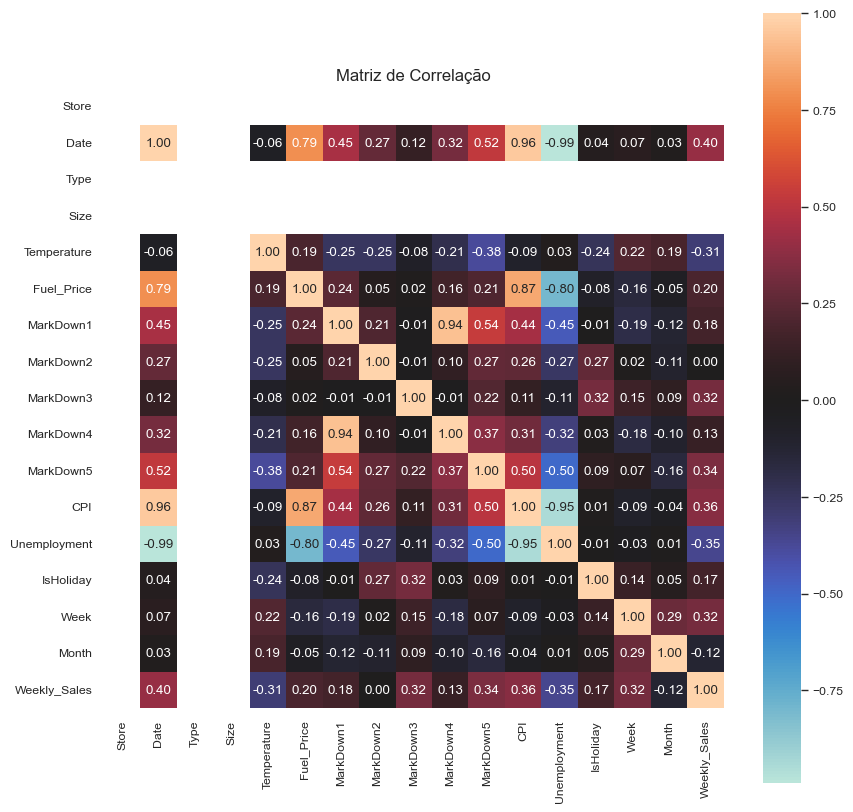

In [19]:
train_plots = pd.concat([train_X, train_y["Weekly_Sales"]], axis=1)

corr = train_plots.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, center=0, square=True, annot=True, fmt=".2f")
plt.title("Matriz de Correlação", fontsize=12)

Text(0.5, 1.0, 'Matriz de Correlação')

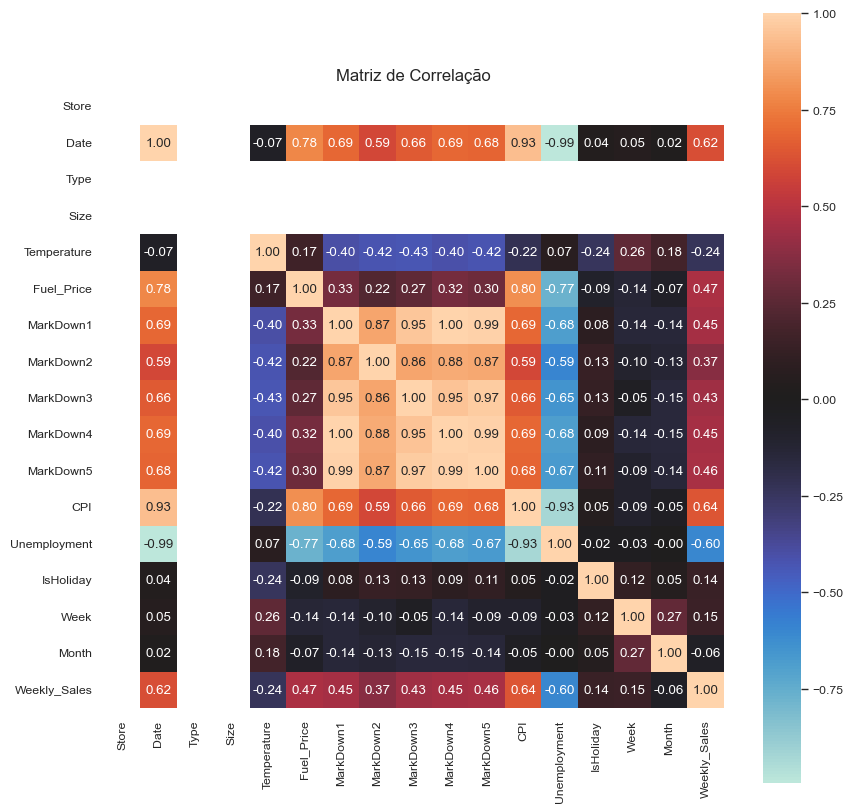

In [20]:
train_plots = pd.concat([train_X, train_y["Weekly_Sales"]], axis=1)

corr = train_plots.corr(method='spearman')
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, center=0, square=True, annot=True, fmt=".2f")
plt.title("Matriz de Correlação", fontsize=12)

Text(0.5, 1.0, 'Matriz de Correlação')

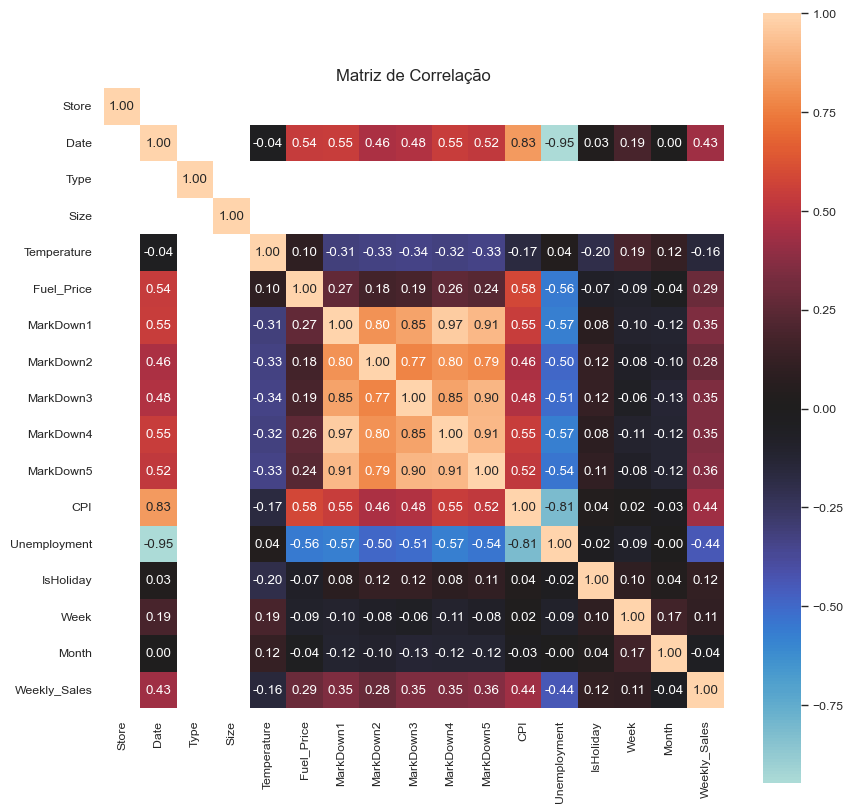

In [21]:
train_plots = pd.concat([train_X, train_y["Weekly_Sales"]], axis=1)

corr = train_plots.corr(method='kendall')
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, center=0, square=True, annot=True, fmt=".2f")
plt.title("Matriz de Correlação", fontsize=12)

In [22]:
# Categorizando 'Size' em 4 categorias
_, bin_edges = pd.cut(train_X['Size'], bins=4, retbins=True)

# Applying the same bins to both training and test sets
train_X['Size_Categorical'] = pd.cut(train_X['Size'], bins=bin_edges, labels=[0, 1, 2, 3], include_lowest=True)
test_X['Size_Categorical'] = pd.cut(test_X['Size'], bins=bin_edges, labels=[0, 1, 2, 3], include_lowest=True)


# Exibindo as primeiras linhas para verificar
train_X.head()
test_X.head()

,Store,Date,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week,Month,Size_Categorical
115,4,2012-04-20,0,205863,68.60,3.864,2774.39,4279.41,43.43,2409.97,4544.22,131.117333,4.308,False,16,0,1
116,4,2012-04-27,0,205863,76.47,3.810,3993.66,97.77,26.68,113.37,3947.45,131.126667,4.308,False,17,0,1
117,4,2012-05-04,0,205863,80.14,3.747,13737.91,0.00,93.65,6993.97,4541.89,131.136000,4.308,False,18,8,1
118,4,2012-05-11,0,205863,67.64,3.685,20499.88,86.00,103.05,5005.96,3815.16,131.145333,4.308,False,19,8,1
119,4,2012-05-18,0,205863,68.43,3.620,6531.12,0.00,99.91,2290.18,2521.84,131.098323,4.308,False,20,8,1


C:\Users\arthu\AppData\Local\Temp\ipykernel_1156\1066826243.py:1: FutureWarning: The provided callable <function mean at 0x0000023355E1AF20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_week = train_plots.groupby("Week")["Weekly_Sales"].agg(np.mean)


Text(0.5, 1.0, 'Média de Vendas Semanais por Semana')

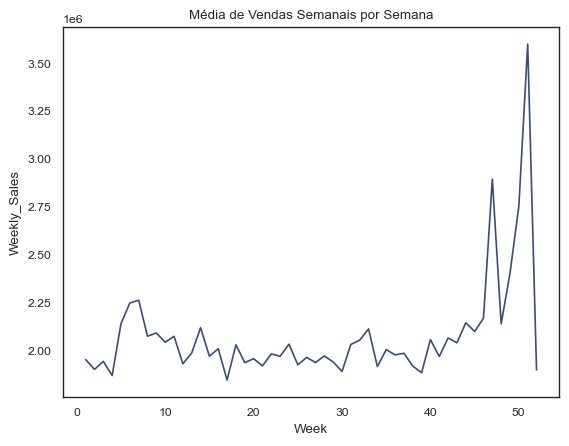

In [23]:
df_week = train_plots.groupby("Week")["Weekly_Sales"].agg(np.mean)
plot = sns.lineplot(x=df_week.index, y=df_week)
plot.set_title("Média de Vendas Semanais por Semana")

C:\Users\arthu\AppData\Local\Temp\ipykernel_1156\1909403430.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_store = train_plots.groupby("Store")["Weekly_Sales"].agg(sum)


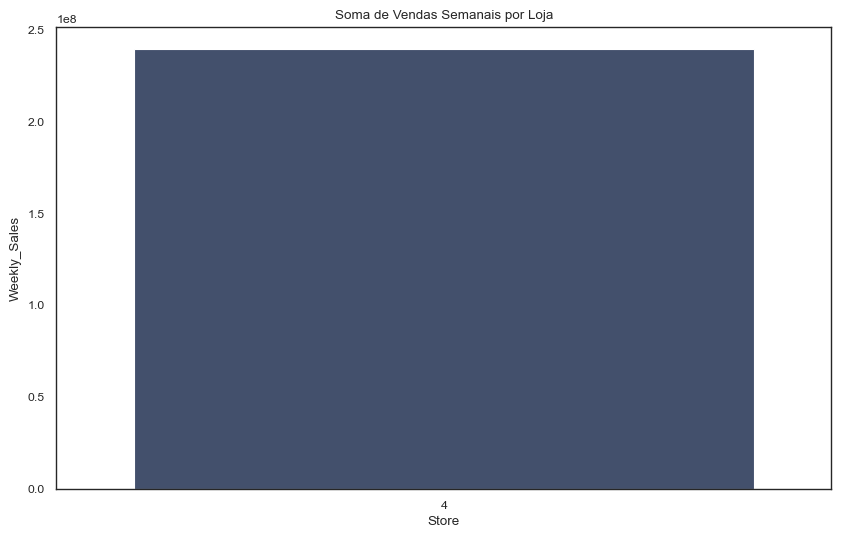

In [24]:

# Your existing code to create the DataFrame and plot
df_store = train_plots.groupby("Store")["Weekly_Sales"].agg(sum)
plt.figure(figsize=(10,6))
plot = sns.barplot(x=df_store.index, y=df_store)
plot.set_title("Soma de Vendas Semanais por Loja")

# Calculate the mean of Weekly_Sales
mean_sales = df_store.mean()

# Iterate over the bars and change the alpha for those below the mean
# for bar in plot.patches:
#     if bar.get_height() < mean_sales:
#         bar.set_alpha(0.5)
        
plt.show()


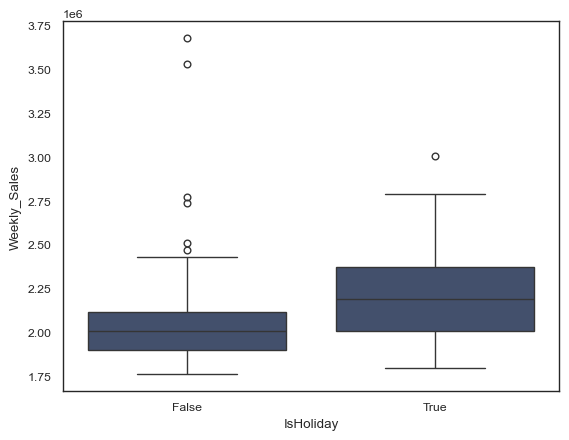

In [25]:
plot = sns.boxplot(data=train_plots, x="IsHoliday", y="Weekly_Sales")

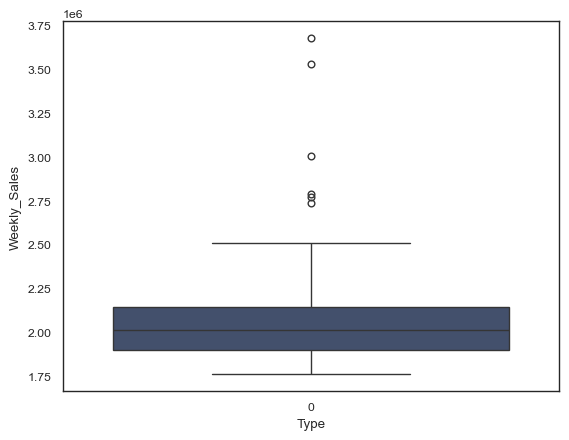

In [26]:
plot = sns.boxplot(data=train_plots, x="Type", y="Weekly_Sales")

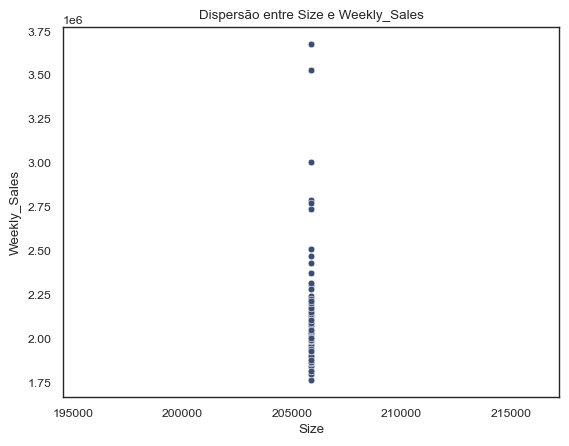

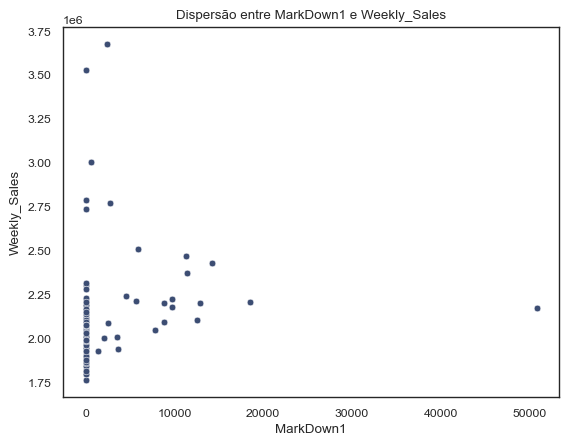

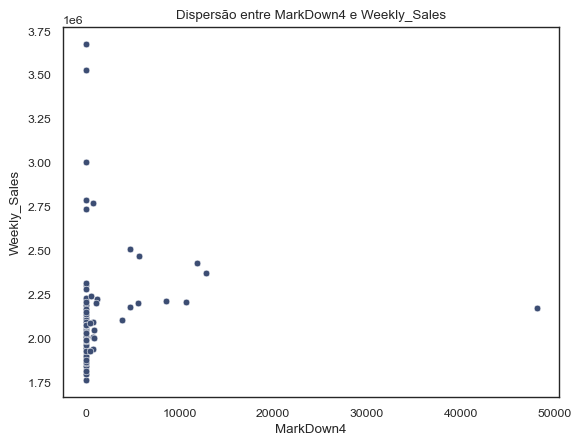

In [27]:

sns.scatterplot(x=train_plots['Size'], y=train_plots['Weekly_Sales'])
plt.title('Dispersão entre Size e Weekly_Sales')
plt.show()

sns.scatterplot(x=train_plots['MarkDown1'], y=train_plots['Weekly_Sales'])
plt.title('Dispersão entre MarkDown1 e Weekly_Sales')
plt.show()

sns.scatterplot(x=train_plots['MarkDown4'], y=train_plots['Weekly_Sales'])
plt.title('Dispersão entre MarkDown4 e Weekly_Sales')
plt.show()

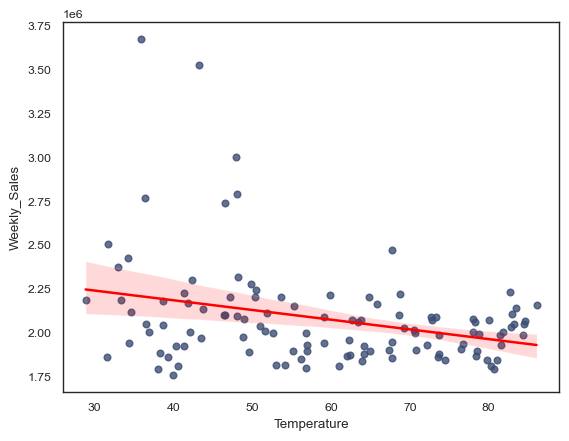

In [28]:
plot = sns.regplot(data=train_plots, x="Temperature", y="Weekly_Sales", line_kws={"color": "red"})

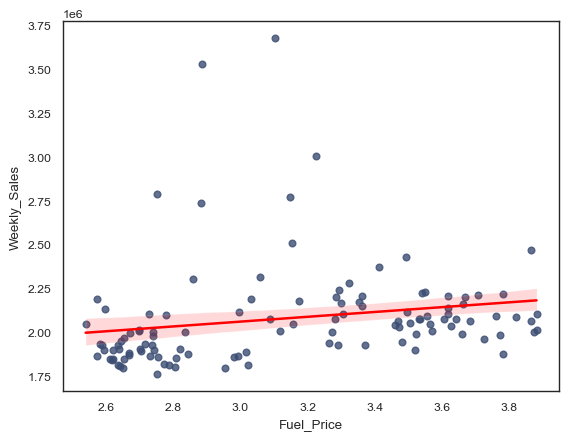

In [29]:
plot = sns.regplot(data=train_plots, x="Fuel_Price", y="Weekly_Sales", line_kws={"color": "red"})

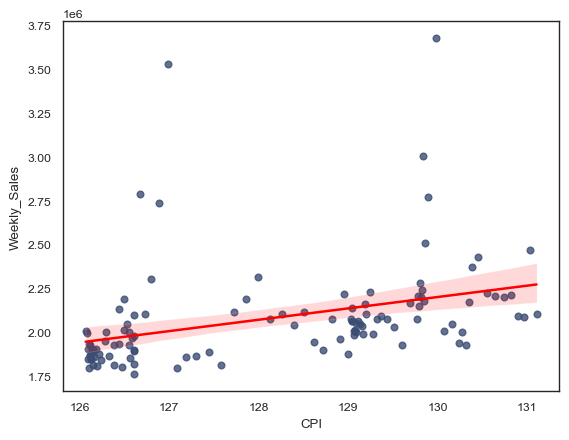

In [30]:
plot = sns.regplot(data=train_plots, x="CPI", y="Weekly_Sales", line_kws={"color": "red"})

In [31]:
# Categorizando 'CPI' em 3 categorias
_, bin_edges = pd.cut(train_X['CPI'], bins=3, retbins=True)

# Applying the same bins to both training and test sets
train_X['CPI_Categorical'] = pd.cut(train_X['CPI'], bins=bin_edges, labels=[0, 1, 2], include_lowest=True)
test_X['CPI_Categorical'] = pd.cut(test_X['CPI'], bins=bin_edges, labels=[0, 1, 2], include_lowest=True)


# Exibindo as primeiras linhas para verificar
train_X.head()
test_X.head()

,Store,Date,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week,Month,Size_Categorical,CPI_Categorical
115,4,2012-04-20,0,205863,68.60,3.864,2774.39,4279.41,43.43,2409.97,4544.22,131.117333,4.308,False,16,0,1,NaN
116,4,2012-04-27,0,205863,76.47,3.810,3993.66,97.77,26.68,113.37,3947.45,131.126667,4.308,False,17,0,1,NaN
117,4,2012-05-04,0,205863,80.14,3.747,13737.91,0.00,93.65,6993.97,4541.89,131.136000,4.308,False,18,8,1,NaN
118,4,2012-05-11,0,205863,67.64,3.685,20499.88,86.00,103.05,5005.96,3815.16,131.145333,4.308,False,19,8,1,NaN
119,4,2012-05-18,0,205863,68.43,3.620,6531.12,0.00,99.91,2290.18,2521.84,131.098323,4.308,False,20,8,1,2


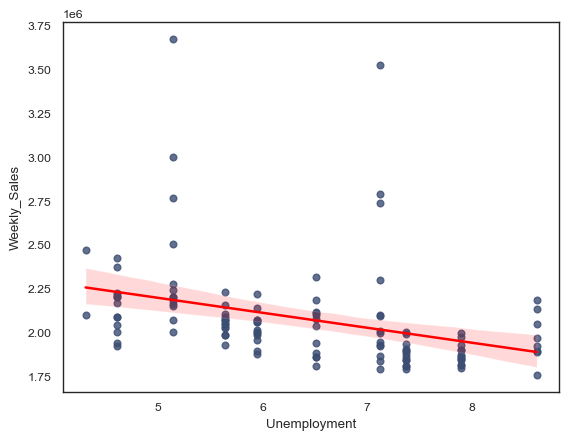

In [32]:
plot = sns.regplot(data=train_plots, x="Unemployment", y="Weekly_Sales", line_kws={"color": "red"})

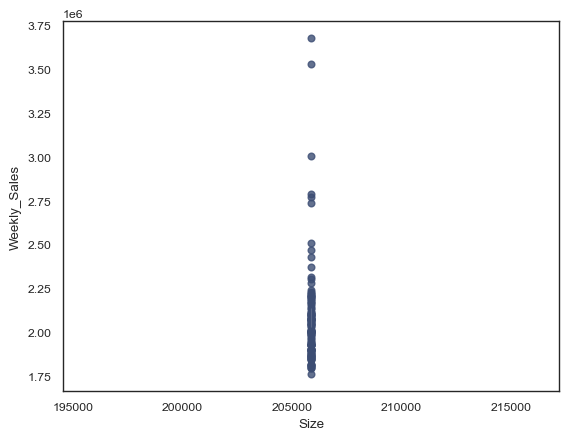

In [33]:
plot = sns.regplot(data=train_plots, x="Size", y="Weekly_Sales", line_kws={"color": "red"})

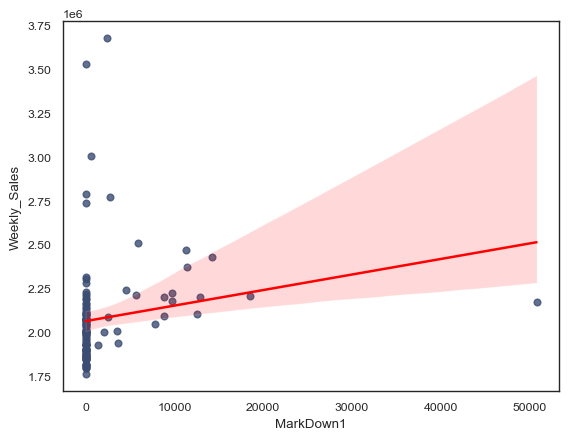

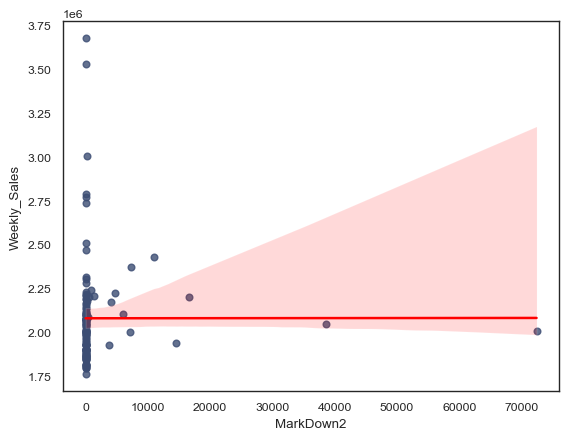

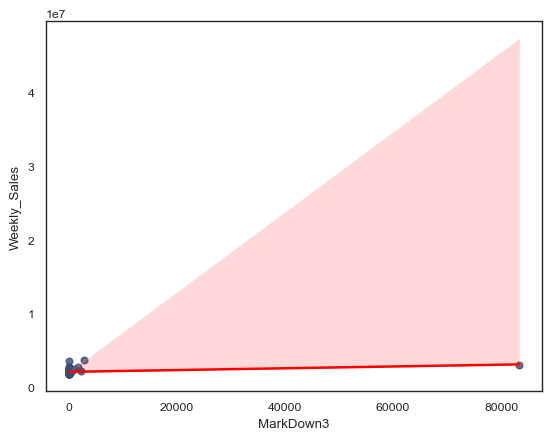

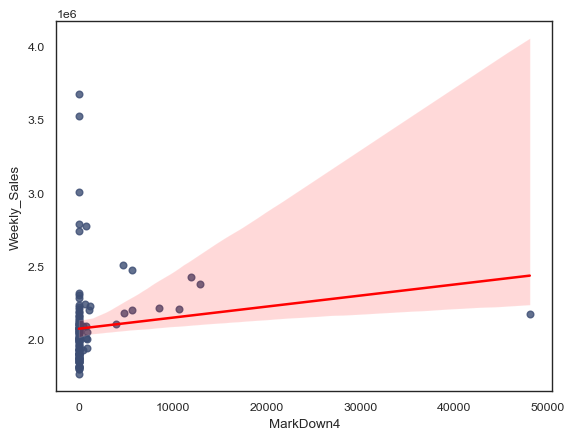

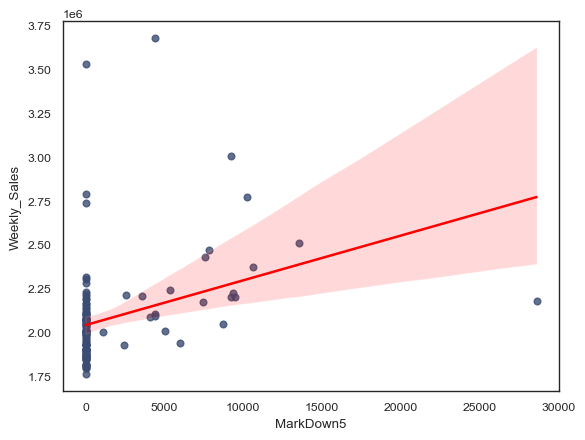

In [34]:
for x in range(1, 6):
    plot = sns.regplot(data=train_plots, x=f"MarkDown{x}", y="Weekly_Sales", line_kws={"color": "red"})
    plt.show()

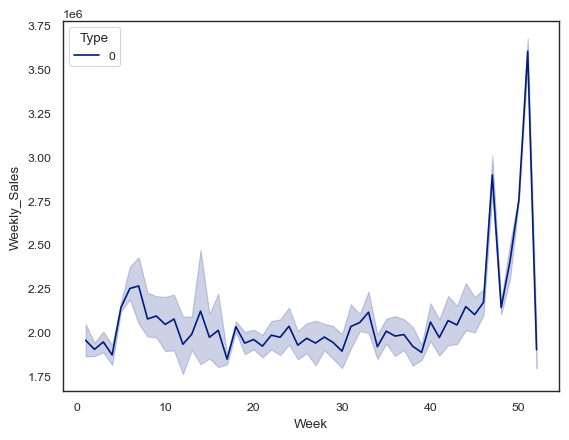

In [35]:
sns.lineplot(x='Week', y='Weekly_Sales', hue='Type', data=train_plots, palette="dark")
plt.show()

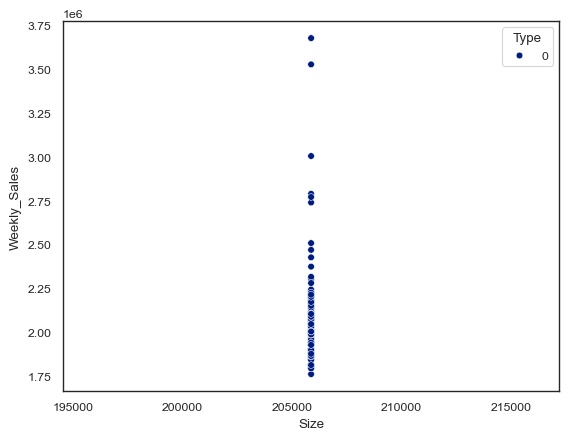

In [36]:
sns.scatterplot(x='Size', y='Weekly_Sales', hue='Type', data=train_plots, palette="dark")
plt.show()

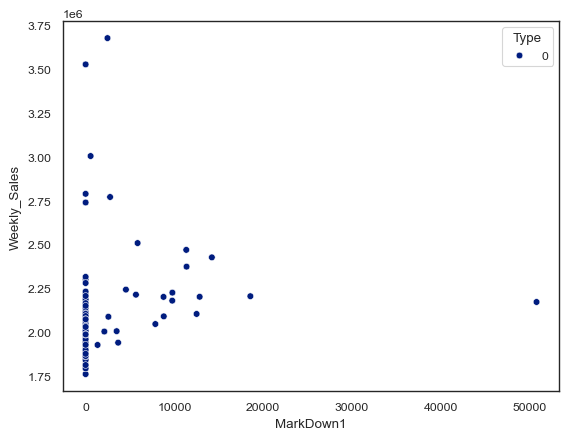

In [37]:
sns.scatterplot(x='MarkDown1', y='Weekly_Sales', hue='Type', data=train_plots, palette="dark")
plt.show()

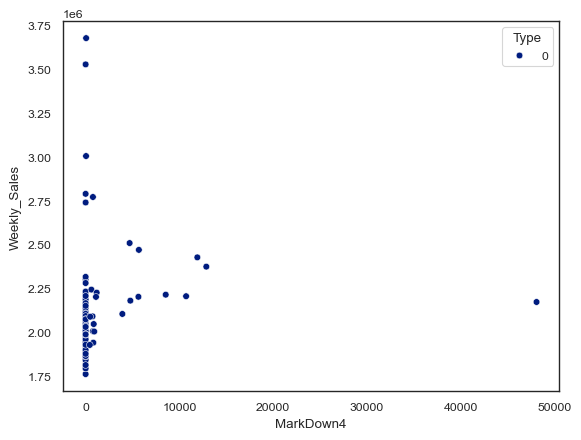

In [38]:
sns.scatterplot(x='MarkDown4', y='Weekly_Sales', hue='Type', data=train_plots, palette="dark")
plt.show()

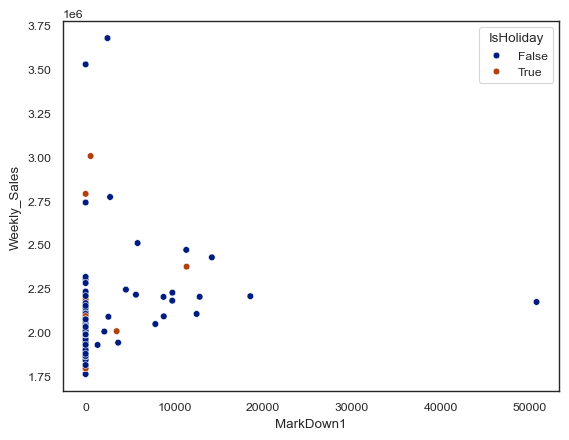

In [39]:
sns.scatterplot(x='MarkDown1', y='Weekly_Sales', hue='IsHoliday', data=train_plots, palette="dark")
plt.show()

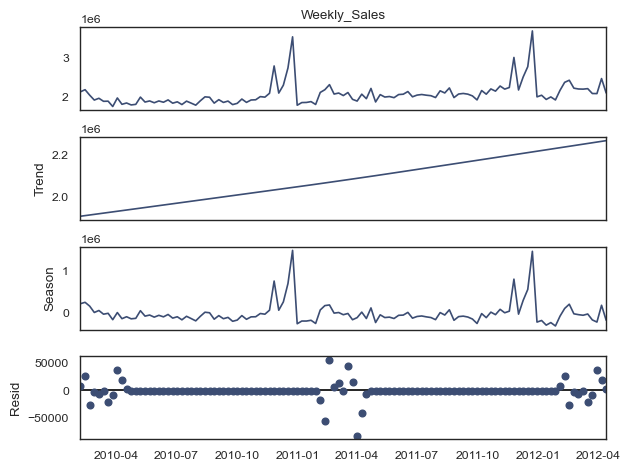

In [40]:
from statsmodels.tsa.seasonal import STL

season_sales = train_plots.groupby('Date')['Weekly_Sales'].sum()

res = STL(season_sales).fit()
res.plot()
plt.show()


<Figure size 640x480 with 0 Axes>

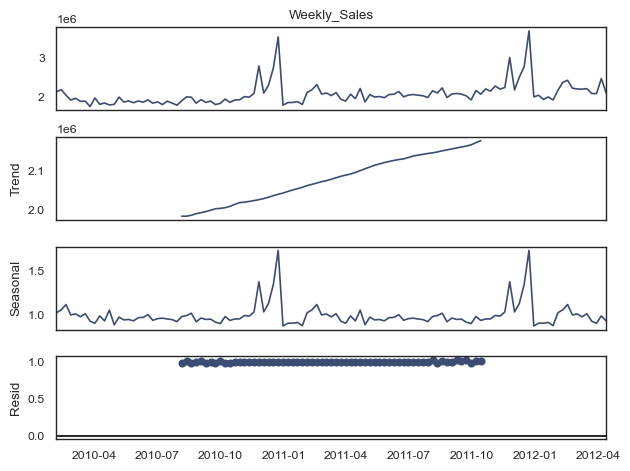

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(season_sales, model='multiplicative')
fig = plt.figure()
fig = decomposition.plot()
plt.show()

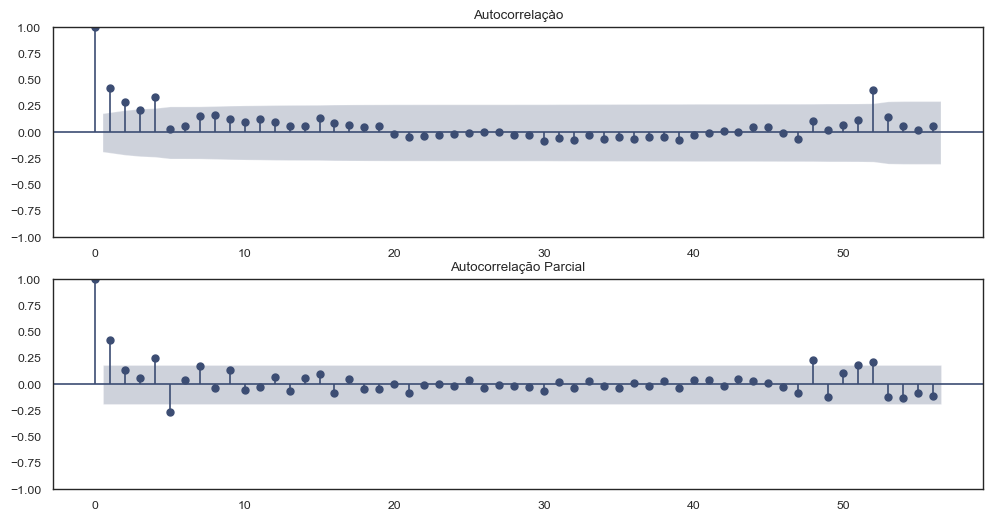

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(season_sales, ax=ax[0], lags=len(season_sales)*0.49, title="Autocorrelaçào")
ax[1] = plot_pacf(season_sales, ax=ax[1], lags=len(season_sales)*0.49, title="Autocorrelação Parcial")

In [43]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

def feature_selection_analysis(df, target):
    # Garantindo que a variável alvo está presente no DataFrame
    if target not in df.columns:
        raise ValueError(f"Target '{target}' not found in DataFrame")

    # Separando as variáveis explicativas e a variável alvo
    X = df.drop(target, axis=1)
    X = X.drop("Date", axis=1)
    y = df[target]

    # Convertendo variáveis categóricas em numéricas (se necessário)
    X = pd.get_dummies(X, drop_first=True)

    # Imputando valores ausentes (se necessário)
    # Por exemplo, usando a mediana para cada coluna
    X = X.fillna(X.median())

    # Inicializando o DataFrame de resultados
    results = pd.DataFrame(index=X.columns)
    
    # Random Forest Feature Importances
    rf = RandomForestRegressor()
    rf.fit(X, y)
    results['RF_Importance'] = rf.feature_importances_

    # PCA
    pca = PCA()
    X_scaled = StandardScaler().fit_transform(X)  # PCA requires scaling
    pca.fit(X_scaled)
    results['PCA'] = pca.explained_variance_ratio_

    # Recursive Feature Elimination (RFE)
    rfe = RFE(estimator=rf, n_features_to_select=1)
    rfe.fit(X, y)
    results['RFE_Ranking'] = rfe.ranking_

    # Mutual Information
    mi = mutual_info_regression(X, y)
    results['Mutual_Info'] = mi


    return results

#feature_selection_results = feature_selection_analysis(pd.concat([train_X, train_y["Weekly_Sales"]], axis=1), 'Weekly_Sales')
#print(feature_selection_results)


In [44]:
from sklearn.preprocessing import StandardScaler
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

def create_time_features(df, date_col):
    df[date_col] = pd.to_datetime(df[date_col])
    return df

def combine_markdowns(df, markdown_cols):
    df['TotalMarkDown'] = df[markdown_cols].sum(axis=1)
    return df

def normalize_features(df, cols_to_normalize, scaler=None):
    if scaler is None:
        scaler = StandardScaler()
        df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])
    else:
        df[cols_to_normalize] = scaler.transform(df[cols_to_normalize])
    return df, scaler

def weeks_until_next_holiday(df, week_col, holiday_col):
    # Inicializando a coluna que guardará o número de semanas até o próximo feriado
    df['WeeksUntilHoliday'] = None

    # Iterando sobre o DataFrame ao contrário (de baixo para cima)
    weeks_to_holiday = None
    for index in reversed(df.index):
        if df.loc[index, holiday_col]:
            weeks_to_holiday = 0
        df.loc[index, 'WeeksUntilHoliday'] = weeks_to_holiday
        if weeks_to_holiday is not None:
            weeks_to_holiday += 1
    
    df["WeeksUntilHoliday"] = df["WeeksUntilHoliday"].fillna(df["WeeksUntilHoliday"].median())

    df['Proximity_Holiday'] = pd.cut(df['WeeksUntilHoliday'], bins=6, labels=[0, 1, 2, 3, 4, 5])

    return df

def create_lagged_and_moving_avg_features(X_df, Y_df, lags, moving_avg_periods):
    
    merged_df = X_df.merge(Y_df[['Date', 'Store', 'Weekly_Sales']], on=['Date', 'Store'])

    # Create lagged features for each store
    for lag in lags:
        merged_df[f'Weekly_Sales_Lag_{lag}'] = merged_df.groupby('Store')['Weekly_Sales'].shift(lag)
        merged_df[f'Weekly_Sales_Lag_{lag}'].fillna(merged_df["Weekly_Sales"].mean(), inplace=True)
        
    for period in moving_avg_periods:
        merged_df[f'Weekly_Sales_MA_{period}'] = merged_df.groupby('Store')['Weekly_Sales'].rolling(window=period).mean().reset_index(0,drop=True)
        merged_df[f'Weekly_Sales_MA_{period}'].fillna(merged_df["Weekly_Sales"].mean(), inplace=True)


    # Drop the original 'Weekly_Sales' as we only need the lags
    merged_df.drop(columns=['Weekly_Sales'], inplace=True)

    # Merge the lagged features back onto the original X dataframe
    X_df = X_df.merge(merged_df, on=['Date', 'Store', 'Type', 'Size', 'Temperature', 'Fuel_Price',
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
    'Unemployment', 'IsHoliday', 'Week', 'Month', 'TotalMarkDown',
    'WeeksUntilHoliday','Size_Categorical', 'Proximity_Holiday',
    'CPI_Categorical'], how='left')
        
    

    return X_df

import pandas as pd

def create_lagged_and_moving_avg_features(train_X, train_y, test_X, test_y, lags, moving_avg_periods):
    # Combine train and test data for feature engineering
    full_X = pd.concat([train_X, test_X])
    full_y = pd.concat([train_y, test_y])

    # Merge features and sales data
    merged_df = full_X.merge(full_y[['Date', 'Store', 'Weekly_Sales']], on=['Date', 'Store'])

    # Create lagged and moving average features
    for lag in lags:
        merged_df[f'Weekly_Sales_Lag_{lag}'] = merged_df.groupby('Store')['Weekly_Sales'].shift(lag)
    
    for period in moving_avg_periods:
        merged_df[f'Weekly_Sales_MA_{period}'] = merged_df.groupby('Store')['Weekly_Sales'].rolling(window=period).mean().reset_index(0, drop=True)

    # Fill missing values with training set mean (to avoid leakage)
    train_mean = train_y['Weekly_Sales'].mean()
    for lag in lags:
        merged_df[f'Weekly_Sales_Lag_{lag}'].fillna(train_mean, inplace=True)
    for period in moving_avg_periods:
        merged_df[f'Weekly_Sales_MA_{period}'].fillna(train_mean, inplace=True)

    # Drop the original 'Weekly_Sales' as we only need the lags
    merged_df.drop(columns=['Weekly_Sales'], inplace=True)

    # Merge the lagged features back onto the original X dataframe
    full_X = full_X.merge(merged_df, on=['Date', 'Store', 'Type', 'Size', 'Temperature', 'Fuel_Price',
                                          'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 
                                          'CPI', 'Unemployment', 'IsHoliday', 'Week', 'Month', 'TotalMarkDown',
                                          'WeeksUntilHoliday', 'Size_Categorical', 'Proximity_Holiday',
                                          'CPI_Categorical'], how='left')

    # Split the datasets back into train and test
    train_X_modified = full_X[full_X['Date'].isin(train_X['Date'])]
    test_X_modified = full_X[full_X['Date'].isin(test_X['Date'])]

    return train_X_modified, test_X_modified





In [45]:

train_X, scaler = normalize_features(train_X, ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'])

train_X = create_time_features(train_X, 'Date')
train_X = combine_markdowns(train_X, ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
train_X = weeks_until_next_holiday(train_X, 'Week', 'IsHoliday')

train_X, test_X = create_lagged_and_moving_avg_features(train_X, train_y, test_X, test_y, lags=[1, 2, 3], moving_avg_periods=[2, 3, 4])

    

In [46]:
test_X, _ = normalize_features(test_X, ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], scaler)

# Other transformations on test_X
# test_X = create_time_features(test_X, 'Date')
test_X = combine_markdowns(test_X, ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
test_X = weeks_until_next_holiday(test_X, 'Week', 'IsHoliday')

In [47]:
test_X.columns == train_X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [48]:
new_vars_df = pd.concat([train_X, train_y["Weekly_Sales"]], axis=1)
feature_selection_results = feature_selection_analysis(new_vars_df, 'Weekly_Sales')
print(feature_selection_results)

                     RF_Importance           PCA  RFE_Ranking   Mutual_Info
Store                     0.000000  2.876606e-01           33  2.997602e-15
Type                      0.000000  1.103386e-01           32  2.997602e-15
Size                      0.000000  9.383774e-02           31  2.997602e-15
Temperature               0.010172  9.090887e-02           11  5.242473e-02
Fuel_Price                0.004202  5.709849e-02           16  2.125038e-01
MarkDown1                 0.001420  4.958930e-02           15  8.107972e-02
MarkDown2                 0.002780  4.430813e-02           18  5.785337e-04
MarkDown3                 0.129701  4.078347e-02            3  2.020185e-02
MarkDown4                 0.005951  3.921101e-02           13  6.547192e-02
MarkDown5                 0.005488  3.447724e-02            9  7.665981e-02
CPI                       0.011172  3.215170e-02           12  3.644904e-01
Unemployment              0.001474  2.774228e-02           19  2.392534e-01
IsHoliday   

In [49]:
train_X.drop(columns=["Proximity_Holiday"], inplace=True)
train_X.drop(columns=["CPI_Categorical"], inplace=True)

test_X.drop(columns=["Proximity_Holiday"], inplace=True)
test_X.drop(columns=["CPI_Categorical"], inplace=True)

In [50]:
from sklearn.model_selection import train_test_split

# Convert boolean columns to integers
train_X['IsHoliday'] = train_X['IsHoliday'].astype(int)

train_X["Date"] = train_X["Date"].astype("datetime64[s]")
train_X["Week"] = train_X["Week"].astype("int")

# Sort the DataFrame by 'Date' to ensure chronological order
train_X = train_X.sort_values(by='Date')

for col in train_X.select_dtypes(include=['bool']).columns:
    train_X[col] = train_X[col].astype(int)

# Convert categorical variables to dummy variables
categorical_cols = train_X.select_dtypes(include=['category']).columns
train_X = pd.get_dummies(train_X, columns=categorical_cols, drop_first=True)

train_X.reset_index(drop=True, inplace=True)

In [51]:
# Convert boolean columns to integers
test_X['IsHoliday'] = test_X['IsHoliday'].astype(int)

test_X["Date"] = test_X["Date"].astype("datetime64[s]")
test_X["Week"] = test_X["Week"].astype("int")

# Sort the DataFrame by 'Date' to ensure chronological order
test_X = test_X.sort_values(by='Date')

for col in test_X.select_dtypes(include=['bool']).columns:
    test_X[col] = test_X[col].astype(int)

# Convert categorical variables to dummy variables
categorical_cols = test_X.select_dtypes(include=['category']).columns
test_X = pd.get_dummies(test_X, columns=categorical_cols, drop_first=True)

test_X.reset_index(drop=True, inplace=True)

In [52]:
test_X[test_X["Store"] == 4]

,Store,Date,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,WeeksUntilHoliday,Weekly_Sales_Lag_1,Weekly_Sales_Lag_2,Weekly_Sales_Lag_3,Weekly_Sales_MA_2,Weekly_Sales_MA_3,Weekly_Sales_MA_4,Size_Categorical_1,Size_Categorical_2,Size_Categorical_3
0,4,2012-04-20,0,205863,0.583404,1.726963,2774.39,4279.41,43.43,2409.97,...,20.0,2105301.39,2470206.13,2089381.77,2124819.140,2.239948e+06,2.202307e+06,True,False,False
1,4,2012-04-27,0,205863,1.069931,1.598251,3993.66,97.77,26.68,113.37,...,19.0,2144336.89,2105301.39,2470206.13,2104201.275,2.104568e+06,2.195978e+06,True,False,False
2,4,2012-05-04,0,205863,1.296813,1.448087,13737.91,0.00,93.65,6993.97,...,18.0,2064065.66,2144336.89,2105301.39,2130516.995,2.135124e+06,2.127668e+06,True,False,False
3,4,2012-05-11,0,205863,0.524056,1.300306,20499.88,86.00,103.05,5005.96,...,17.0,2196968.33,2064065.66,2144336.89,2162314.750,2.129565e+06,2.133258e+06,True,False,False
4,4,2012-05-18,0,205863,0.572894,1.145374,6531.12,0.00,99.91,2290.18,...,16.0,2127661.17,2196968.33,2064065.66,2167437.990,2.177281e+06,2.148977e+06,True,False,False
5,4,2012-05-25,0,205863,1.131752,0.980908,4330.02,436.00,862.31,3268.41,...,15.0,2207214.81,2127661.17,2196968.33,2180676.240,2.163005e+06,2.171495e+06,True,False,False
6,4,2012-06-01,0,205863,1.128043,0.818826,10165.22,8.60,47.93,2676.33,...,14.0,2154137.67,2207214.81,2127661.17,2166749.305,2.180238e+06,2.167094e+06,True,False,False
7,4,2012-06-08,0,205863,1.171317,0.699648,7429.46,249.80,7.86,4235.27,...,13.0,2179360.94,2154137.67,2207214.81,2212309.060,2.192919e+06,2.196493e+06,True,False,False
8,4,2012-06-15,0,205863,1.346269,0.554251,16063.84,84.00,0.22,2105.39,...,12.0,2245257.18,2179360.94,2154137.67,2239724.055,2.219603e+06,2.203237e+06,True,False,False
9,4,2012-06-22,0,205863,1.388926,0.451758,6619.20,351.22,3.48,5390.02,...,11.0,2234190.93,2245257.18,2179360.94,2215745.290,2.225583e+06,2.214027e+06,True,False,False


In [53]:
test_y[test_y["Store"] == 4]

,Weekly_Sales,Date,Store
115,2144336.89,2012-04-20,4
116,2064065.66,2012-04-27,4
117,2196968.33,2012-05-04,4
118,2127661.17,2012-05-11,4
119,2207214.81,2012-05-18,4
120,2154137.67,2012-05-25,4
121,2179360.94,2012-06-01,4
122,2245257.18,2012-06-08,4
123,2234190.93,2012-06-15,4
124,2197299.65,2012-06-22,4


In [54]:
train_X.columns

Index(['Store', 'Date', 'Type', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Week', 'Month', 'TotalMarkDown',
       'WeeksUntilHoliday', 'Weekly_Sales_Lag_1', 'Weekly_Sales_Lag_2',
       'Weekly_Sales_Lag_3', 'Weekly_Sales_MA_2', 'Weekly_Sales_MA_3',
       'Weekly_Sales_MA_4', 'Size_Categorical_1', 'Size_Categorical_2',
       'Size_Categorical_3'],
      dtype='object')

In [55]:
from pmdarima import auto_arima, ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Function to preprocess data
def preprocess_data(df):
    for col in df.select_dtypes(include=['bool']).columns:
        df.loc[:, col] = df[col].astype(int)

    df.set_index("Date", inplace=True)
    df.index = pd.DatetimeIndex(df.index).to_period("W")
    return df

# Function to return an ARIMA model
def get_arima_model(training_y, training_X, column):
    model = auto_arima(y = training_y[column],
                        X = training_X,
                        start_p=1, start_q=1,
                        max_p=3, max_q=3,
                        start_P=0,
                        d=None, trace=False,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)

    return model


def get_sarima_model(training_y, training_X, column, seasonal_period=52):
    model = ARIMA(y = training_y[column],
                    X = training_X,
                    m = seasonal_period,
                    order=(2, 0, 1),
                    seasonal_order= (1, 0, 1, 52),
                    seasonal = True,
                    trend="n",
                    trace = True,
                    error_action = 'ignore',  
                    suppress_warnings = True, 
                    stepwise = True)
    
    return model

def get_exp_smoothing_model(data, column, trend='add', seasonal='add', seasonal_periods=52):
    model = ExponentialSmoothing(data[column], trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fitted_model = model.fit()
    return fitted_model

def create_models(training_X, training_y, model_type):
    store_models = {}
    for store in training_X['Store'].unique():
        print(f"Model: {model_type}")
        print(f"Store: {store}")
        
        store_training_y, store_training_X = preprocess_data(training_y[training_y["Store"] == store]), preprocess_data(training_X[training_X["Store"] == store])

        if model_type == 'arima':
            model = get_arima_model(store_training_y, store_training_X, "Weekly_Sales")
        elif model_type == 'sarima':
            model = get_sarima_model(store_training_y, store_training_X, "Weekly_Sales")
            model.fit(y = store_training_y["Weekly_Sales"],
                      X = store_training_X)
        elif model_type == 'exp_smoothing':
            model = get_exp_smoothing_model(store_training_y, "Weekly_Sales")

        store_models[store] = model
        
    return store_models




In [56]:
# Create ARIMA, SARIMA, and Exponential Smoothing models
store_arima_models = create_models(train_X, train_y, 'arima')
store_sarima_models = create_models(train_X, train_y, 'sarima')
store_exp_models = create_models(train_X, train_y, 'exp_smoothing')

Model: arima
Store: 4
Model: sarima
Store: 4
Model: exp_smoothing
Store: 4


C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [57]:
def make_predictions(test_X, store_models, model_type):
    predictions = pd.DataFrame()
    
    for store in test_X["Store"].unique():
        test_X_store = test_X[test_X["Store"] == store]
        test_X_store.set_index("Date", inplace=True)
        test_X_store.index = pd.DatetimeIndex(test_X_store.index).to_period("W")

        print(f"Store: {store}\nModel: {model_type}")
        
        if model_type == 'arima':
            pred = store_models[store].predict(n_periods=len(test_X_store),
                                        X=test_X_store)
        elif model_type == 'sarima':
            pred = store_models[store].predict(n_periods=len(test_X_store), X=test_X_store)
            pred.index = test_X_store.index
        
        elif model_type == 'exp_smoothing':
            start = test_X_store.index[0]
            end = test_X_store.index[-1]
            pred = store_models[store].predict(start=start, end=end)

        print(test_X_store.index == pred.index)
        
        temp_df = pd.DataFrame({f"{model_type.capitalize()}_Predictions": pred}, index=test_X_store.index)
        temp_df['Store'] = store
        
        
        predictions = pd.concat([predictions, temp_df])
    
    return predictions



In [58]:
# Generate predictions
arima_predictions = make_predictions(test_X, store_arima_models, 'arima')
sarima_predictions = make_predictions(test_X, store_sarima_models, 'sarima')
exp_smoothing_predictions = make_predictions(test_X, store_exp_models, 'exp_smoothing')

Store: 4
Model: arima
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
Store: 4
Model: sarima
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
Store: 4
Model: exp_smoothing
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['y', 'X', 'm', 'seasonal', 'trace', 'error_action', 'stepwise']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [59]:
df_results = pd.DataFrame()

for store in test_y["Store"].unique():
    temp_df = pd.DataFrame()
    sarima_temp_df = pd.DataFrame()
    exp_temp_df = pd.DataFrame()
    
    store_test_y = test_y[test_y["Store"] == store].reset_index(drop=True)
    arima_store = arima_predictions[arima_predictions["Store"] == store].reset_index()
    sarima_store = sarima_predictions[sarima_predictions["Store"] == store].reset_index()
    exp_store = exp_smoothing_predictions[exp_smoothing_predictions["Store"] == store].reset_index()
    
    temp_df = pd.concat([store_test_y, arima_store["Arima_Predictions"], sarima_store["Sarima_Predictions"], exp_store["Exp_smoothing_Predictions"]], axis=1)
    df_results = pd.concat([df_results, temp_df])

df_results.set_index(["Store", "Date"], inplace=True)
df_results

Weekly_Sales  Arima_Predictions  Sarima_Predictions  \
Store Date                                                              
4     2012-04-20    2144336.89       2.138005e+06        2.138005e+06   
      2012-04-27    2064065.66       2.056835e+06        2.056834e+06   
      2012-05-04    2196968.33       2.189853e+06        2.189852e+06   
      2012-05-11    2127661.17       2.119246e+06        2.119245e+06   
      2012-05-18    2207214.81       2.201355e+06        2.201355e+06   
      2012-05-25    2154137.67       2.148924e+06        2.148924e+06   
      2012-06-01    2179360.94       2.172691e+06        2.172691e+06   
      2012-06-08    2245257.18       2.239669e+06        2.239669e+06   
      2012-06-15    2234190.93       2.226452e+06        2.226452e+06   
      2012-06-22    2197299.65       2.192414e+06        2.192414e+06   
      2012-06-29    2128362.92       2.123195e+06        2.123195e+06   
      2012-07-06    2224499.28       2.217050e+06        2.217050e+06   
      2012-07-13    2100252.61       2.091950e+06        2.091950e+06   
      2012-07-20    2175563.69       2.168538e+06        2.168538e+06   
      2012-07-27    2048613.65       2.043492e+06        2.043492e+06   
      2012-08-03    2174514.13       2.166763e+06        2.166762e+06   
      2012-08-10    2193367.69       2.185905e+06        2.185905e+06   
      2012-08-17    2283540.30       2.279535e+06        2.279535e+06   
      2012-08-24    2125241.68       2.121534e+06        2.121534e+06   
      2012-08-31    2081181.35       2.075568e+06        2.075568e+06   
      2012-09-07    2125104.72       2.118246e+06        2.118246e+06   
      2012-09-14    2117854.60       2.109477e+06        2.109476e+06   
      2012-09-21    2119438.53       2.111586e+06        2.111586e+06   
      2012-09-28    2027620.23       2.020492e+06        2.020492e+06   
      2012-10-05    2209835.43       2.200714e+06        2.200714e+06   
      2012-10-12    2133026.07       2.123994e+06        2.123994e+06   
      2012-10-19    2097266.85       2.088139e+06        2.088139e+06   
      2012-10-26    2149594.46       2.140833e+06        2.140832e+06   

                  Exp_smoothing_Predictions  
Store Date                                   
4     2012-04-20               2.381869e+06  
      2012-04-27               2.037423e+06  
      2012-05-04               2.221000e+06  
      2012-05-11               2.157882e+06  
      2012-05-18               2.170465e+06  
      2012-05-25               2.140764e+06  
      2012-06-01               2.219456e+06  
      2012-06-08               2.228028e+06  
      2012-06-15               2.295741e+06  
      2012-06-22               2.163881e+06  
      2012-06-29               2.206330e+06  
      2012-07-06               2.220248e+06  
      2012-07-13               2.202991e+06  
      2012-07-20               2.191039e+06  
      2012-07-27               2.144980e+06  
      2012-08-03               2.227786e+06  
      2012-08-10               2.330081e+06  
      2012-08-17               2.320407e+06  
      2012-08-24               2.170332e+06  
      2012-08-31               2.257788e+06  
      2012-09-07               2.187829e+06  
      2012-09-14               2.221198e+06  
      2012-09-21               2.130816e+06  
      2012-09-28               2.164692e+06  
      2012-10-05               2.274413e+06  
      2012-10-12               2.189488e+06  
      2012-10-19               2.247434e+06  
      2012-10-26               2.251286e+06

C:\Users\arthu\AppData\Local\Temp\ipykernel_1156\559858278.py:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=avg_by_date_combined.index, y=avg_by_date_combined[column], label=column, palette="pastel",
C:\Users\arthu\AppData\Local\Temp\ipykernel_1156\559858278.py:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=avg_by_date_combined.index, y=avg_by_date_combined[column], label=column, palette="pastel",
C:\Users\arthu\AppData\Local\Temp\ipykernel_1156\559858278.py:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=avg_by_date_combined.index, y=avg_by_date_combined[column], label=column, palette="pastel",
C:\Users\arthu\AppData\Local\Temp\ipykernel_1156\559858278.py:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=avg_by_date_combined.index, y=avg_by_date_combined[column], label=col

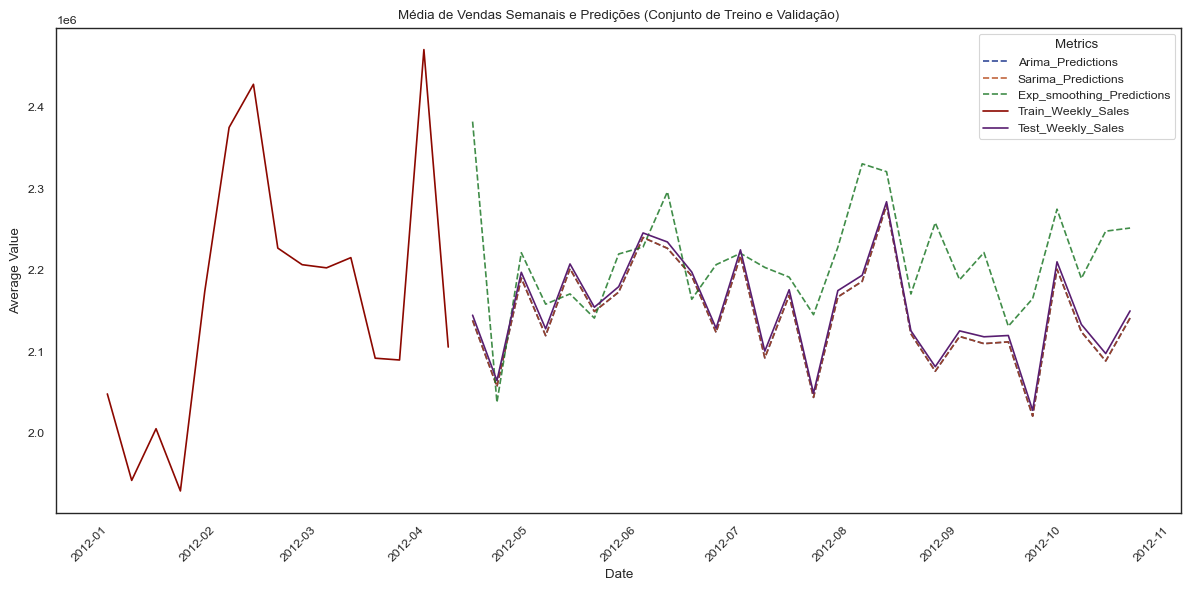

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming train_y is your training dataset with similar structure
# Concatenate training and test datasets
combined_df = pd.concat([train_y, df_results.reset_index()])

plot_split_date = datetime(year=2012, month=1, day=1)

combined_df = combined_df.loc[combined_df["Date"] > plot_split_date, :]
combined_df.loc[:, "Train_Weekly_Sales"] = combined_df.loc[combined_df["Date"] <= split_date, "Weekly_Sales"]
combined_df.loc[:, "Test_Weekly_Sales"] = combined_df.loc[combined_df["Date"] > split_date, "Weekly_Sales"]
combined_df.drop(columns=["Weekly_Sales"], inplace=True)

# Group by Date and calculate the average for each column
avg_by_date_combined = combined_df.groupby('Date').mean().drop(columns=["Store"])

# Plotting the data
plt.figure(figsize=(12, 6))

sns.set_palette("dark")

# Plot each column separately to manually control labels and line styles
for i, column in enumerate(avg_by_date_combined.columns):
    if column == "Train_Weekly_Sales" or column == "Test_Weekly_Sales":
        sns.lineplot(x=avg_by_date_combined.index, y=avg_by_date_combined[column], label=column, palette="pastel")
    else:
        ax = sns.lineplot(x=avg_by_date_combined.index, y=avg_by_date_combined[column], label=column, palette="pastel",
                          linestyle="--", alpha=0.8)

plt.title('Média de Vendas Semanais e Predições (Conjunto de Treino e Validação)')
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


In [61]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Metrics Calculation
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

# Weight Calculation
def calculate_weights(mae, rmse, mape):
    epsilon = 1e-10
    weights = {
        'mae': 1 / (mae + epsilon),
        'rmse': 1 / (rmse + epsilon),
        'mape': 1 / (mape + epsilon)
    }
    total_weight = sum(weights.values())
    for k in weights:
        weights[k] /= total_weight
    return weights


# Function to ensure indices are compatible
def align_data(actual, predictions):
    if isinstance(actual.index, pd.PeriodIndex):
        actual.index = actual.index.to_timestamp()
    if isinstance(predictions.index, pd.PeriodIndex):
        predictions.index = predictions.index.to_timestamp()

    # Check if indices are aligned
    if not actual.index.equals(predictions.index):
        print("Indices are not aligned.")
        print("Actual indices:", actual.index)
        print("Prediction indices:", predictions.index)

    aligned_actual, aligned_predictions = actual.align(predictions, join='inner')

    # Check if there are no overlapping indices
    if len(aligned_actual) == 0 or len(aligned_predictions) == 0:
        print("No overlapping data after alignment.")
        print("Aligned actual data:", aligned_actual)
        print("Aligned prediction data:", aligned_predictions)

    return aligned_actual, aligned_predictions



# Initialize a DataFrame to store the final results
final_results = pd.DataFrame()

# Iterate over each store
for store in df_results.index.get_level_values('Store').unique():
    store_data = df_results.xs(store, level='Store')

    # Splitting the actual and prediction data for each model
    arima_actual, arima_pred_aligned = align_data(store_data['Weekly_Sales'], store_data['Arima_Predictions'])
    sarima_actual, sarima_pred_aligned = align_data(store_data['Weekly_Sales'], store_data['Sarima_Predictions'])
    exp_actual, exp_pred_aligned = align_data(store_data['Weekly_Sales'], store_data['Exp_smoothing_Predictions'])

    # Calculating metrics for each model
    arima_metrics = calculate_metrics(arima_actual, arima_pred_aligned)
    sarima_metrics = calculate_metrics(sarima_actual, sarima_pred_aligned)
    exp_metrics = calculate_metrics(exp_actual, exp_pred_aligned)

    # Adding the results to the final DataFrame
    store_result = pd.DataFrame({
        'Store': store,
        'ARIMA_MAE': arima_metrics[0],
        'ARIMA_RMSE': arima_metrics[1],
        'ARIMA_MAPE': arima_metrics[2],
        'SARIMA_MAE': sarima_metrics[0],
        'SARIMA_RMSE': sarima_metrics[1],
        'SARIMA_MAPE': sarima_metrics[2],
        'EXP_SMOOTHING_MAE': exp_metrics[0],
        'EXP_SMOOTHING_RMSE': exp_metrics[1],
        'EXP_SMOOTHING_MAPE': exp_metrics[2]
    }, index=[0])

    final_results = pd.concat([final_results, store_result], ignore_index=True)

# Set the index to 'Store'
final_results.set_index('Store', inplace=True)

# Display the final results
final_results.mean()



ARIMA_MAE              6889.871788
ARIMA_RMSE             7053.805425
ARIMA_MAPE                0.320635
SARIMA_MAE             6890.163113
SARIMA_RMSE            7054.089362
SARIMA_MAPE               0.320648
EXP_SMOOTHING_MAE     69771.562392
EXP_SMOOTHING_RMSE    89249.129829
EXP_SMOOTHING_MAPE        3.275197
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Residual Analysis for Arima
Summary Statistics of Residuals:
 count    28.000000
mean      0.320635
std       0.073134
min       0.174465
25%       0.261606
50%       0.329380
75%       0.376690
max       0.435204
dtype: float64


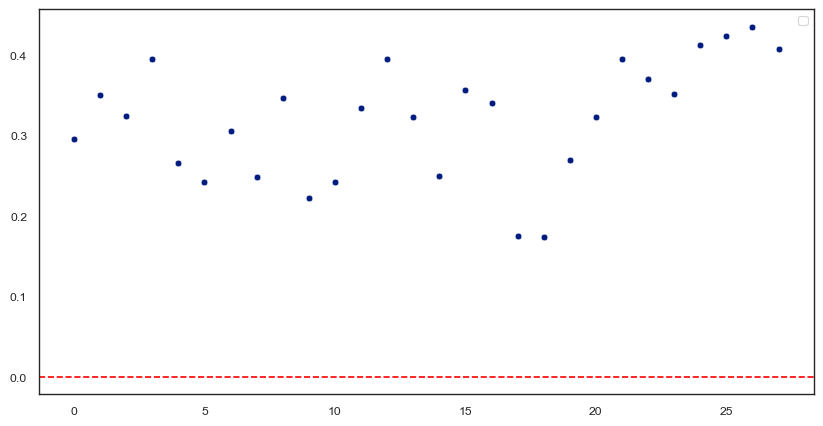

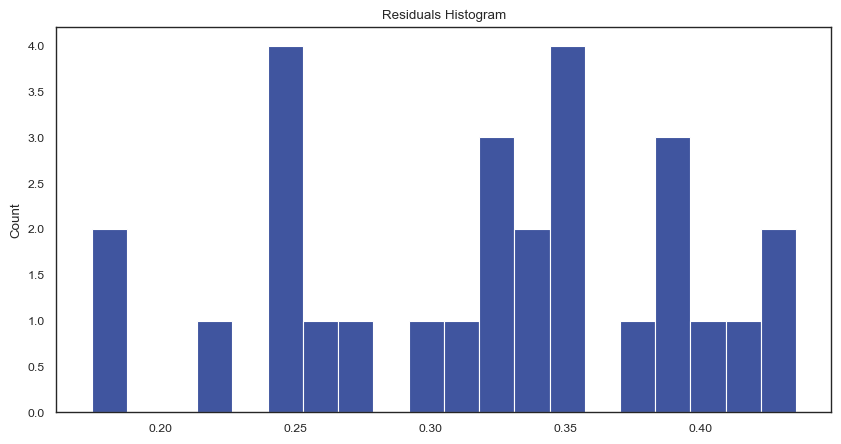

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Durbin-Watson statistic: 0.05 (Values close to 2 suggest no autocorrelation)
Ljung-Box test statistic: 14.71, p-value: 0.143

--------------------------------------------------

Residual Analysis for Sarima
Summary Statistics of Residuals:
 count    28.000000
mean      0.320648
std       0.073134
min       0.174479
25%       0.261619
50%       0.329393
75%       0.376703
max       0.435218
dtype: float64


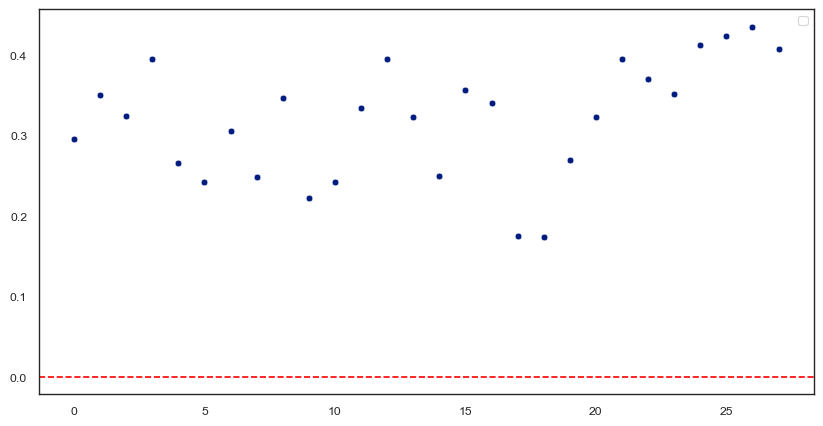

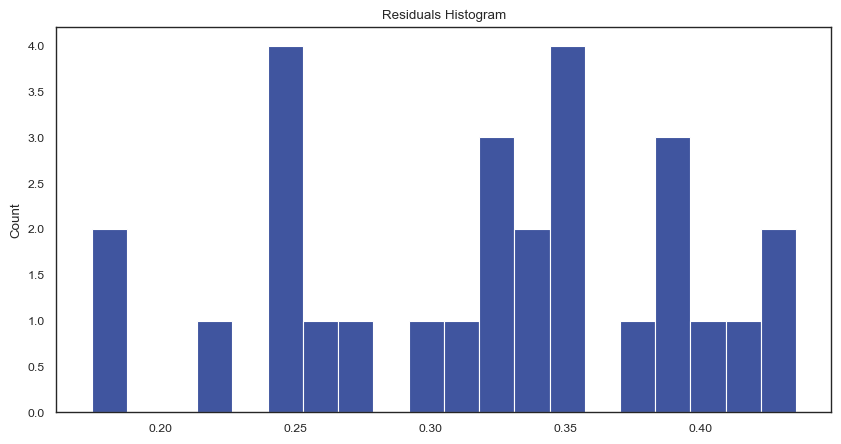

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Durbin-Watson statistic: 0.05 (Values close to 2 suggest no autocorrelation)
Ljung-Box test statistic: 14.71, p-value: 0.143

--------------------------------------------------

Residual Analysis for Exp_smoothing
Summary Statistics of Residuals:
 count    28.000000
mean     -2.842628
std       3.162606
min     -11.077168
25%      -4.767963
50%      -2.548426
75%      -0.667681
max       1.664964
dtype: float64


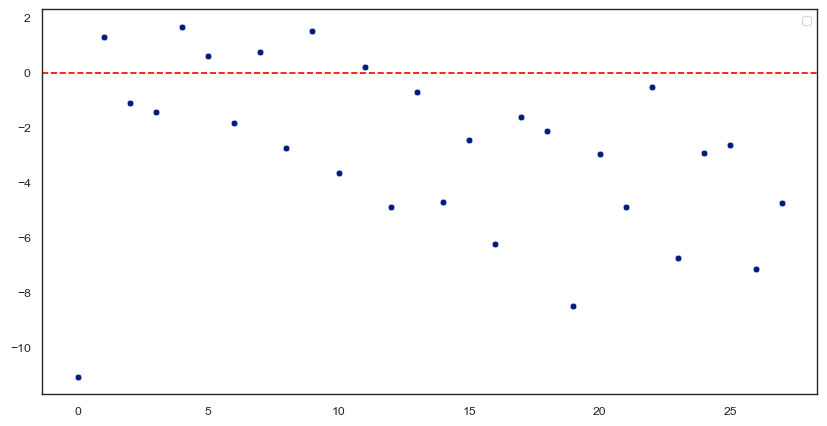

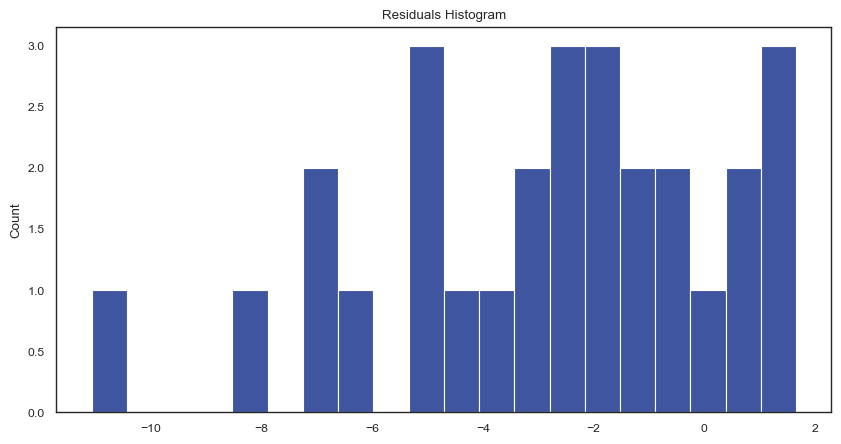

Durbin-Watson statistic: 1.06 (Values close to 2 suggest no autocorrelation)
Ljung-Box test statistic: 5.53, p-value: 0.853

--------------------------------------------------



In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox

# Function to calculate residuals
def calculate_residuals(actual, predicted):
    actual = pd.Series(actual).reset_index(drop=True)
    predicted = pd.Series(predicted).reset_index(drop=True)
    return ((actual - predicted) * 100) / actual

# Function to analyze residuals
def analyze_residuals(residuals):
    residuals = pd.Series(residuals)
    print("Summary Statistics of Residuals:\n", residuals.describe())
    
    plt.figure(figsize=(10, 5))
    sns.scatterplot(residuals)
    plt.axhline(y=0, color='r', linestyle='--')

    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 5))
    sns.histplot(residuals, bins=20)
    plt.title('Residuals Histogram')
    plt.show()
    
    dw_stat = durbin_watson(residuals)
    print(f"Durbin-Watson statistic: {dw_stat:.2f} (Values close to 2 suggest no autocorrelation)")

    try:
        lb_result = acorr_ljungbox(residuals.dropna(), lags=[10], return_df=True)
        print(f"Ljung-Box test statistic: {lb_result['lb_stat'][10]:.2f}, p-value: {lb_result['lb_pvalue'][10]:.3f}")
    except Exception as e:
        print(f"Error in Ljung-Box test: {e}")

for model_name in ['Arima', 'Sarima', 'Exp_smoothing']:
    print(f"Residual Analysis for {model_name}")
    actual_sales = df_results['Weekly_Sales']
    predicted_sales = df_results[f'{model_name}_Predictions']
    residuals = calculate_residuals(actual_sales, predicted_sales)
    
    analyze_residuals(residuals)
    print("\n" + "-" * 50 + "\n")




In [63]:
df_results.groupby("Date").mean()

,Weekly_Sales,Arima_Predictions,Sarima_Predictions,Exp_smoothing_Predictions
Date,,,,
2012-04-20,2144336.89,2.138005e+06,2.138005e+06,2.381869e+06
2012-04-27,2064065.66,2.056835e+06,2.056834e+06,2.037423e+06
2012-05-04,2196968.33,2.189853e+06,2.189852e+06,2.221000e+06
2012-05-11,2127661.17,2.119246e+06,2.119245e+06,2.157882e+06
2012-05-18,2207214.81,2.201355e+06,2.201355e+06,2.170465e+06
2012-05-25,2154137.67,2.148924e+06,2.148924e+06,2.140764e+06
2012-06-01,2179360.94,2.172691e+06,2.172691e+06,2.219456e+06
2012-06-08,2245257.18,2.239669e+06,2.239669e+06,2.228028e+06
2012-06-15,2234190.93,2.226452e+06,2.226452e+06,2.295741e+06
